Загрузка данных
EDA
Обработка выбросов
Обработка пропусков
Построение новых признаков
Отбор признаков
Разбиение на train и test
Построение модели
Прогнозирование на тестовом датасете

# Подготовка к работе

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
FOLDER_PATH= r'C:\Users\Alexey Kotov\Downloads\Kaggle'
import os
for dirname, _, filenames in os.walk(FOLDER_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\Alexey Kotov\Downloads\Kaggle\sample_submission.csv
C:\Users\Alexey Kotov\Downloads\Kaggle\test.csv
C:\Users\Alexey Kotov\Downloads\Kaggle\train.csv


# 0. Загрузка данных

In [3]:
TRAIN_DATASET_PATH = r'C:\Users\Alexey Kotov\Downloads\Kaggle\train.csv'
TEST_DATASET_PATH = r'C:\Users\Alexey Kotov\Downloads\Kaggle\test.csv'

In [4]:
train_df=pd.read_csv(TRAIN_DATASET_PATH)
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [5]:
test_df=pd.read_csv(TEST_DATASET_PATH)
test_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B


In [6]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

# 1. EDA¶

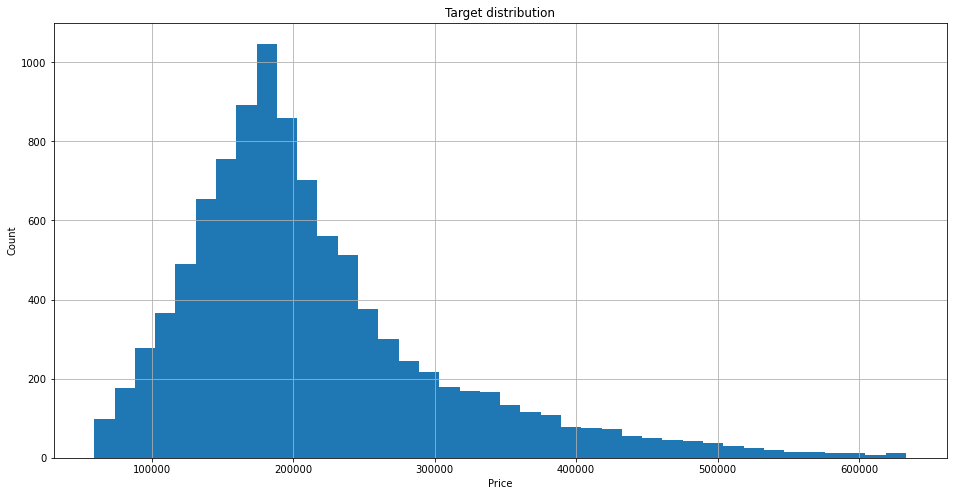

In [7]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=40)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()


# Цены распределены без явных выбросов

In [8]:
# 2. Обработка выбросов

In [9]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [10]:
rooms_square=train_df.groupby('Rooms').Square.agg(['mean'])
# rooms_square['mean']

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: mean, dtype: float64

In [11]:
# Ограничения на кол-во комнат (от 1 до 6)

train_df['Rooms_edited']=0
train_df.loc[(train_df['Rooms']==0) | (train_df['Rooms']>=6),'Rooms_edited']=1

train_df.head()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.871089,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.553407,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.720850,0
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.102962,0


In [12]:
# Ограничения на кол-во комнат (от 1 до 6)

train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = 1
train_df.loc[train_df['Rooms'] >= 6, 'Rooms'] = 1
train_df['Rooms'].value_counts()

2.0    3880
1.0    3717
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

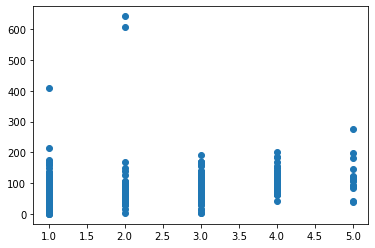

In [13]:
# Анализ на соотношение площади и кол

plt.scatter(train_df['Rooms'],train_df['Square'])
plt.show

In [14]:
rooms_square_pivot=train_df.groupby('Rooms').Square.agg(['mean'])
rooms_square_pivot['mean']

Rooms
1.0     41.425089
2.0     56.788214
3.0     76.903234
4.0     98.377544
5.0    122.614941
Name: mean, dtype: float64

In [15]:
# Убрать выбросы в площади по сравнению с соотношения комната/площадь

for i in range (1,6):
    rooms_square=train_df.loc[(train_df['Rooms']==i),['Square']].quantile(.975)
    train_df.loc[(train_df['Rooms']==i) & (train_df['Square']>rooms_square[0]),'Square']=rooms_square[0]
    
for i in range (1,6):
    rooms_square_min=train_df.loc[(train_df['Rooms']==i),['Square']].quantile(.025)
    train_df.loc[(train_df['Rooms']==i) & (train_df['Square']<rooms_square_min[0]),'Square']=rooms_square_min[0]
       
       
       
    

In [16]:
# Ограничения на площадь кухни

max_square_kitchen=20
min_square_kitchen=5
median_square_kitchen=train_df['KitchenSquare'].quantile(0.5)

train_df.loc[(train_df['KitchenSquare']>max_square_kitchen),'KitchenSquare']=max_square_kitchen
train_df.loc[(train_df['KitchenSquare']<min_square_kitchen),'KitchenSquare']=min_square_kitchen

<function matplotlib.pyplot.show(close=None, block=None)>

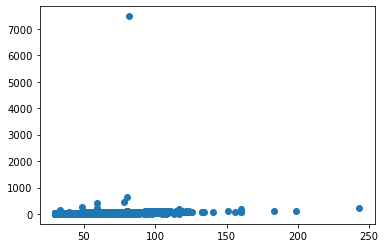

In [17]:
# Проверка на соотношения площадь/жилая площадь

plt.scatter(train_df['Square'],train_df['LifeSquare'])
plt.show

In [18]:
# Вычисляем вспомогательную площадь (общая площадь-жилая - кухня)

add_square_per_room=(train_df.loc[(train_df['LifeSquare']<train_df['Square']), 'Square'] \
                    -train_df.loc[(train_df['LifeSquare']<train_df['Square']), 'LifeSquare']\
                     - train_df.loc[(train_df['LifeSquare']<train_df['Square']), 'KitchenSquare'])

add_square_per_room=pd.DataFrame(add_square_per_room,columns=['Square'])

rooms_for_merge=pd.DataFrame(train_df.loc[(train_df['LifeSquare']<train_df['Square']), 'Rooms'],columns=['Rooms'])
add_square_per_room['Rooms']=rooms_for_merge['Rooms']
add_square_per_room_pivot=add_square_per_room.groupby('Rooms').Square.agg(['mean'])
add_square_per_room_pivot

,mean
Rooms,
1.0,9.351562
2.0,12.597445
3.0,17.475574
4.0,23.997595
5.0,24.782022


In [19]:
# Заполняем жилую площадь, где не выполняется условия, что она меньше общей площади

for i in range (1,6):
        a=add_square_per_room_pivot._get_value(i,'mean')
        b=train_df.loc[(train_df['Rooms']==i & (train_df['LifeSquare']>train_df['Square'])),'Square']
        c=train_df.loc[(train_df['Rooms']==i & (train_df['LifeSquare']>train_df['Square'])),'KitchenSquare']
        train_df.loc[(train_df['Rooms']==i) & (train_df['LifeSquare']>train_df['Square']),'LifeSquare']=b-c-a
                      
       
    
        

        

In [20]:
room_square_quantile=train_df['LifeSquare'].quantile(0.025)

average_room_square=train_df.groupby('Rooms').LifeSquare.agg(['mean'])

       
    
for i in range (1,6):
    train_df.loc[(train_df['Rooms']==i) & (train_df['LifeSquare']<average_room_square._get_value(i,'mean')),'LifeSquare']=\
    average_room_square._get_value(i,'mean')

In [21]:
# Ограничения на возраст дома

min_house_year=1900
max_house_year=2020

train_df.loc[train_df['HouseYear'] <= min_house_year, 'HouseYear'] = min_house_year
train_df.loc[train_df['HouseYear'] >= max_house_year, 'HouseYear'] = max_house_year

# Не год постройки, а возраст
train_df['HouseYear']=2020-train_df['HouseYear']

In [22]:
# Заменить А и В на категории

binary_to_numbers = {'A': 0, 'B': 1,'C':2}

train_df['Ecology_2'] = train_df['Ecology_2'].replace(binary_to_numbers)
train_df['Ecology_3'] = train_df['Ecology_3'].replace(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].replace(binary_to_numbers)

In [23]:
train_df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,6,0.075424,...,1,11,3097,0,NaN,0,0,1,305018.871089,0
1,3013,22,1.0,39.832524,23.299374,8.0,7,8.0,54,0.118537,...,1,30,6207,1,1183.0,1,0,1,177734.553407,0
2,8215,1,3.0,78.342215,48.464678,10.0,2,17.0,32,0.025609,...,1,33,5261,0,240.0,3,1,1,282078.720850,0
3,2352,1,1.0,40.409907,NaN,5.0,10,22.0,43,0.007122,...,1,1,264,0,NaN,0,1,1,168106.007630,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,48,0.282798,...,1,33,8667,2,NaN,0,6,1,343995.102962,0


In [24]:
# Расчет размера района

district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited,DistrictSize
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,6,0.075424,...,11,3097,0,NaN,0,0,1,305018.871089,0,851
1,3013,22,1.0,39.832524,23.299374,8.0,7,8.0,54,0.118537,...,30,6207,1,1183.0,1,0,1,177734.553407,0,78
2,8215,1,3.0,78.342215,48.464678,10.0,2,17.0,32,0.025609,...,33,5261,0,240.0,3,1,1,282078.720850,0,652
3,2352,1,1.0,40.409907,NaN,5.0,10,22.0,43,0.007122,...,1,264,0,NaN,0,1,1,168106.007630,0,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,48,0.282798,...,33,8667,2,NaN,0,6,1,343995.102962,0,89


In [26]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited,DistrictSize
count,10000.000000,10000.000000,7608.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887200,55.861292,37.091385,7.08490,8.526700,12.609400,35.127600,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399,0.001200,242.306600
std,0.811629,17.889684,13.762280,2.54993,5.241148,6.775974,18.416347,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865,0.034622,268.992652
min,1.000000,29.718544,23.299374,5.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,1.000000
25%,1.000000,41.784623,23.299374,5.00000,4.000000,9.000000,19.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942,0.000000,55.000000
50%,2.000000,52.876587,33.806729,6.00000,7.000000,13.000000,43.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879,0.000000,104.000000
75%,2.000000,65.684481,48.464678,9.00000,12.000000,17.000000,46.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171,0.000000,511.000000
max,5.000000,243.041366,233.949309,20.00000,42.000000,117.000000,110.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000,851.000000


In [27]:
class NoiseCorrection():
    def __init__(self):
        self.rooms_square=None
        self.rooms_square_pivot=None
        self.rooms_square=None
        self.max_square_kitchen=20
        self.min_square_kitchen=5
        self.median_square_kitchen=None
        self.add_square_per_room=None
        self.add_square_per_room_pivot=None
        self.room_square_quantile=None
        self.a=None
        self.b=None
        self.c=None
        self.average_room_square=None
        self.min_floor=None
        self.max_floor=None
        self.min_house_year=None
        self.max_house_year=None
        self.district_size=None
    
    def correct(self,x):
        
        df = x.copy()
    
        
        
        df['Rooms_edited']=0
        df.loc[(df['Rooms']==0) | (df['Rooms']>=6),'Rooms_edited']=1
        df.loc[df['Rooms'] == 0, 'Rooms'] = 1
        df.loc[df['Rooms'] >= 6, 'Rooms'] = 1
        
        self.rooms_square_pivot=train_df.groupby('Rooms').Square.agg(['mean'])
        
        
        for i in range (1,6):
            self.rooms_square=df.loc[(df['Rooms']==i),['Square']].quantile(.975)
            df.loc[(df['Rooms']==i) & (df['Square']>self.rooms_square[0]),'Square']=self.rooms_square[0]
    
        for i in range (1,6):
            self.rooms_square_min=df.loc[(df['Rooms']==i),['Square']].quantile(.025)
            df.loc[(df['Rooms']==i) & (df['Square']<self.rooms_square_min[0]),'Square']=self.rooms_square_min[0]
    
        self.max_square_kitchen=20
        self.min_square_kitchen=5
        self.median_square_kitchen=df['KitchenSquare'].quantile(0.5)

        df.loc[(df['KitchenSquare']>self.max_square_kitchen),'KitchenSquare']=self.max_square_kitchen
        df.loc[(df['KitchenSquare']<self.min_square_kitchen),'KitchenSquare']=self.min_square_kitchen

        self.add_square_per_room=(df.loc[(df['LifeSquare']<df['Square']), 'Square'] \
                    -df.loc[(df['LifeSquare']<df['Square']), 'LifeSquare']\
                     - df.loc[(df['LifeSquare']<df['Square']), 'KitchenSquare'])

        self.add_square_per_room=pd.DataFrame(self.add_square_per_room,columns=['Square'])

        self.rooms_for_merge=pd.DataFrame(df.loc[(df['LifeSquare']<df['Square']), 'Rooms'],columns=['Rooms'])
        self.add_square_per_room['Rooms']=self.rooms_for_merge['Rooms']
        self.add_square_per_room_pivot=self.add_square_per_room.groupby('Rooms').Square.agg(['mean'])
        self.add_square_per_room_pivot
       
    
        for i in range (1,6):
            self.a=add_square_per_room_pivot._get_value(i,'mean')
            self.b=df.loc[(df['Rooms']==i & (df['LifeSquare']>df['Square'])),'Square']
            self.c=df.loc[(df['Rooms']==i & (df['LifeSquare']>df['Square'])),'KitchenSquare']
            df.loc[(df['Rooms']==i) & (df['LifeSquare']>df['Square']),'LifeSquare']=self.b-self.c-self.a
                      
       
        self.room_square_quantile=df['LifeSquare'].quantile(0.025)

        self.average_room_square=df.groupby('Rooms').LifeSquare.agg(['mean'])


        for i in range (1,6):
            df.loc[(df['Rooms']==i) & (df['LifeSquare']<self.average_room_square._get_value(i,'mean')),'LifeSquare']=\
            self.average_room_square._get_value(i,'mean')
            
            
            
            
        self.min_floor=1
        self.max_floor=40


        df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = self.min_floor
        df.loc[train_df['HouseFloor'] >= 40, 'HouseFloor'] = self.max_floor

        df.loc[train_df['Floor'] == 0, 'Floor'] = self.min_floor
        df.loc[train_df['Floor'] >=40, 'Floor'] = self.max_floor

            
            
        self.min_house_year=1900
        self.max_house_year=2020

        df.loc[df['HouseYear'] <= self.min_house_year, 'HouseYear'] = self.min_house_year
        df.loc[df['HouseYear'] >= self.max_house_year, 'HouseYear'] = self.max_house_year


        df['HouseYear']=2020-df['HouseYear']
        
        

            
  
            
        return df
        
       
       

In [28]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited,DistrictSize
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,6,0.075424,...,11,3097,0,NaN,0,0,1,305018.871089,0,851
1,3013,22,1.0,39.832524,23.299374,8.0,7,8.0,54,0.118537,...,30,6207,1,1183.0,1,0,1,177734.553407,0,78
2,8215,1,3.0,78.342215,48.464678,10.0,2,17.0,32,0.025609,...,33,5261,0,240.0,3,1,1,282078.720850,0,652
3,2352,1,1.0,40.409907,NaN,5.0,10,22.0,43,0.007122,...,1,264,0,NaN,0,1,1,168106.007630,0,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,48,0.282798,...,33,8667,2,NaN,0,6,1,343995.102962,0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.806729,6.0,3,12.0,39,0.300323,...,52,10311,6,NaN,1,9,1,119367.455796,0,118
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,43,0.072158,...,2,629,1,NaN,0,0,0,199715.148807,0,851
9997,2795,178,1.0,29.718544,23.299374,5.0,3,5.0,62,0.460556,...,20,4386,14,NaN,1,5,1,165953.912580,0,7
9998,14561,21,1.0,32.330292,23.299374,5.0,3,9.0,51,0.194489,...,47,8004,3,125.0,3,5,1,171842.411855,0,165


In [29]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_edited,DistrictSize
count,10000.000000,10000.000000,7608.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.887200,55.861292,37.091385,7.08490,8.526700,12.609400,35.127600,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.917500,214138.857399,0.001200,242.306600
std,0.811629,17.889684,13.762280,2.54993,5.241148,6.775974,18.416347,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865,0.034622,268.992652
min,1.000000,29.718544,23.299374,5.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,1.000000
25%,1.000000,41.784623,23.299374,5.00000,4.000000,9.000000,19.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,1.000000,153872.633942,0.000000,55.000000
50%,2.000000,52.876587,33.806729,6.00000,7.000000,13.000000,43.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879,0.000000,104.000000
75%,2.000000,65.684481,48.464678,9.00000,12.000000,17.000000,46.000000,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,1.000000,249135.462171,0.000000,511.000000
max,5.000000,243.041366,233.949309,20.00000,42.000000,117.000000,110.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570,1.000000,851.000000


In [30]:
target_name = 'Price'

train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

y = train_df[target_name]
x = train_df.drop(columns=target_name)


x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=42)

In [31]:
noisecorrector=NoiseCorrection()



x_train=noisecorrector.correct(x_train)

x_valid=noisecorrector.correct(x_valid)

In [32]:
x_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Rooms_edited
count,6700.000000,6700.000000,6700.000000,6700.000000,5091.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,3446.000000,6700.000000,6700.000000,6700.000000
mean,8386.431791,50.219104,1.883582,55.609571,36.895143,7.070448,8.418507,12.517015,35.335075,0.118484,24.611493,5339.214179,7.847313,1136.049042,1.310000,4.178358,0.000746
std,4886.317503,43.523441,0.808892,17.752257,13.859443,2.539691,5.197668,6.505742,18.360307,0.119817,17.542611,4021.361282,23.429653,1026.393614,1.490234,4.759257,0.027310
min,0.000000,0.000000,1.000000,29.720755,23.139505,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4148.500000,19.000000,1.000000,41.712208,23.139505,5.000000,4.000000,9.000000,20.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000
50%,8395.000000,35.000000,2.000000,52.553212,33.786483,6.000000,7.000000,12.000000,43.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000
75%,12614.500000,75.000000,2.000000,65.455958,48.275775,9.000000,12.000000,17.000000,47.000000,0.194489,36.000000,7227.000000,5.000000,1547.750000,2.000000,5.000000,0.000000
max,16798.000000,209.000000,5.000000,258.384386,233.949309,20.000000,40.000000,40.000000,108.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [33]:
class Naf():
    def __init__(self):
        
        self.rooms_square_mean=None
        self.median_square_kitchen=None
        self.average_room_square=None
        
        
        
    def fill (self,df):
        
        
        
        
        self.average_room_square=df.groupby('Rooms').LifeSquare.agg(['mean'])
        
        

       
        
        for i in range (1,6):
      
            self.rooms_square_mean=df.loc[(df['Rooms']==i),['Square']].quantile(0.5)
            df.loc[(df['Rooms']==i) & (df['Square'].isna()),'Square']=self.rooms_square_mean[0]
            
            
        
        for i in range (1,6):
            df.loc[(df['Rooms']==i) & (df['LifeSquare'].isna()),'LifeSquare']=\
            self.average_room_square._get_value(i,'mean') 
            
            df.loc[(df['Rooms']==i)& (df['LifeSquare'].isna()==True),'LifeSquare']=\
            self.average_room_square._get_value(i,'mean') 


            
        return df



In [34]:
naf=Naf()
x_train=naf.fill(x_train)
x_valid=naf.fill(x_valid)

In [35]:
x_train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Rooms_edited
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,3446.000000,6700.000000,6700.000000,6700.000000
mean,8386.431791,50.219104,1.883582,55.609571,36.721548,7.070448,8.418507,12.517015,35.335075,0.118484,24.611493,5339.214179,7.847313,1136.049042,1.310000,4.178358,0.000746
std,4886.317503,43.523441,0.808892,17.752257,13.036725,2.539691,5.197668,6.505742,18.360307,0.119817,17.542611,4021.361282,23.429653,1026.393614,1.490234,4.759257,0.027310
min,0.000000,0.000000,1.000000,29.720755,23.139505,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4148.500000,19.000000,1.000000,41.712208,25.769735,5.000000,4.000000,9.000000,20.000000,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000
50%,8395.000000,35.000000,2.000000,52.553212,33.786483,6.000000,7.000000,12.000000,43.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000
75%,12614.500000,75.000000,2.000000,65.455958,48.275775,9.000000,12.000000,17.000000,47.000000,0.194489,36.000000,7227.000000,5.000000,1547.750000,2.000000,5.000000,0.000000
max,16798.000000,209.000000,5.000000,258.384386,233.949309,20.000000,40.000000,40.000000,108.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000


In [36]:
# Заполнить средней площадью, где пропуск

for i in range (1,6):
      
            rooms_square_mean=train_df.loc[(train_df['Rooms']==i),['Square']].quantile(0.5)
            train_df.loc[(train_df['Rooms']==i) & (train_df['Square'].isna()),'Square']=rooms_square_mean[0]


            average_room_square=train_df.groupby('Rooms').LifeSquare.agg(['mean'])
            
          

In [37]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


# Генерация Фич

In [38]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


In [39]:
binary_to_numbers = {'A': 0, 'B': 1}


train_df['Ecology_2'] = train_df['Ecology_2'].map(binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
train_df['Ecology_3'] = train_df['Ecology_3'].map(binary_to_numbers)
train_df['Shops_2'] = train_df['Shops_2'].map(binary_to_numbers)

In [40]:
# Здравоохранение по району

healthcare_by_districts=train_df.groupby('DistrictId').Healthcare_1.agg(['mean']).reset_index()


healthcare_by_disctricts_value=healthcare_by_districts['mean'].mean()



healthcare_by_districts.loc[(healthcare_by_districts['mean'].isna()),'mean']=healthcare_by_disctricts_value

train_df= train_df.merge(healthcare_by_districts, on='DistrictId', how='left')

In [41]:
# Размер района
district_size = train_df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

train_df = train_df.merge(district_size, on='DistrictId', how='left')


In [42]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean,DistrictSize
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,11,3097,0,NaN,0,0,1,305018.871089,1584.727774,851
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,30,6207,1,1183.0,1,0,1,177734.553407,1223.830986,78
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,33,5261,0,240.0,3,1,1,282078.720850,228.771930,652
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,1,264,0,NaN,0,1,1,168106.007630,228.771930,652
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,33,8667,2,NaN,0,6,1,343995.102962,1584.727774,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,52,10311,6,NaN,1,9,1,119367.455796,80.000000,118
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,2,629,1,NaN,0,0,0,199715.148807,1584.727774,851
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,20,4386,14,NaN,1,5,1,165953.912580,628.000000,7
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,47,8004,3,125.0,3,5,1,171842.411855,247.557692,165


In [43]:
class FeatureGenerator():
    
    def __init__(self):
        self.binary_to_number=None
        self.healthcare_by_districts=None
        self.district_size=None
        self.med_price_by_district=None
        self.sample_data=None
        self.med_price_by_room=None
    
        
    def hello(self):
        print('hello')
            
         
        
    def generate(self, df, y=None):
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        
        df['Id'] = df['Id'].astype(str)
        df['DistrictId'] = df['DistrictId'].astype(str)
        
        


        df['Ecology_2'] = df['Ecology_2'].map(self.binary_to_numbers)  
        df['Ecology_3'] = df['Ecology_3'].map(self.binary_to_numbers)
        df['Shops_2'] = df['Shops_2'].map(self.binary_to_numbers)

        
        
        
        self.healthcare_by_districts=df.groupby('DistrictId').Healthcare_1.agg(['mean']).reset_index()


        self.healthcare_by_disctricts_value=self.healthcare_by_districts['mean'].mean()



        self.healthcare_by_districts.loc[(self.healthcare_by_districts['mean'].isna()),'mean']=self.healthcare_by_disctricts_value

        df= df.merge(self.healthcare_by_districts, on='DistrictId', how='left')
        
        
        self.district_size = df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

        df = df.merge(self.district_size, on='DistrictId', how='left')
        
        
        

        df['floor_cat'] = 0

        df.loc[df['Floor'] <= 3, 'floor_cat'] = 1  
        df.loc[(df['Floor'] > 3) & (df['Floor'] <= 5), 'floor_cat'] = 2
        df.loc[(df['Floor'] > 5) & (df['Floor'] <= 9), 'floor_cat'] = 3
        df.loc[(df['Floor'] > 9) & (df['Floor'] <= 15), 'floor_cat'] = 4
        df.loc[df['Floor'] > 15, 'floor_cat'] = 5
        
        if y is not None:
  
                df['Price'] = y.values

                self.med_price_by_district = df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                        .rename(columns={'Price':'MedPriceByDistrict'})


                df = df.merge(self.med_price_by_district, on=['DistrictId', 'Rooms'], how='left')


                df.drop('Price', inplace=True, axis=1)
                
        return df
                
    def generate_med_price (self,test_df,train_x,train_y) :
        self.sample_data=train_x
        self.med_price_by_district=None
        self.med_price_by_district=self.sample_data.groupby(['DistrictId','Rooms'], as_index=False).agg({'MedPriceByDistrict':'median'}).rename(columns={'Price':'MedPriceByDistrict'})
            
        test_df=test_df.merge(self.med_price_by_district, on=['DistrictId','Rooms'],how='left')
        
        for i in range (1,6):
            self.med_price_by_room=self.med_price_by_district.groupby(['Rooms']).agg({'MedPriceByDistrict':'median'})._get_value(i,'MedPriceByDistrict')
            test_df.loc[(test_df['MedPriceByDistrict'].isna() & test_df['Rooms']==i),'MedPriceByDistrict']=self.med_price_by_room
        
        return test_df
    



In [44]:
featuregenerator=FeatureGenerator()
x_train=featuregenerator.generate(x_train, y_train)
x_valid=featuregenerator.generate(x_valid,y_valid)


In [45]:
x_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Rooms_edited', 'mean',
       'DistrictSize', 'floor_cat', 'MedPriceByDistrict'],
      dtype='object')

In [46]:
features_for_model=['Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Rooms_edited', 'DistrictSize',
       'mean', 'floor_cat', 'MedPriceByDistrict']

In [47]:
features_for_model

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Rooms_edited',
 'DistrictSize',
 'mean',
 'floor_cat',
 'MedPriceByDistrict']

In [48]:
x_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_edited,mean,DistrictSize,floor_cat,MedPriceByDistrict
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,3446.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.883582,55.609571,36.721548,7.070448,8.418507,12.517015,35.335075,0.118484,0.989851,0.972836,...,7.847313,1136.049042,1.310000,4.178358,0.915672,0.000746,1133.771402,164.040299,2.938507,210448.897667
std,0.808892,17.752257,13.036725,2.539691,5.197668,6.505742,18.360307,0.119817,0.100238,0.162574,...,23.429653,1026.393614,1.490234,4.759257,0.277900,0.027310,844.344059,181.693963,1.258063,75814.207579
min,1.000000,29.720755,23.139505,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,82342.775873
25%,1.000000,41.712208,25.769735,5.000000,4.000000,9.000000,20.000000,0.017647,1.000000,1.000000,...,0.000000,350.000000,0.000000,1.000000,1.000000,0.000000,365.302326,38.000000,2.000000,162138.526832
50%,2.000000,52.553212,33.786483,6.000000,7.000000,12.000000,43.000000,0.072158,1.000000,1.000000,...,2.000000,900.000000,1.000000,3.000000,1.000000,0.000000,1183.000000,71.000000,3.000000,193698.921629
75%,2.000000,65.455958,48.275775,9.000000,12.000000,17.000000,47.000000,0.194489,1.000000,1.000000,...,5.000000,1547.750000,2.000000,5.000000,1.000000,0.000000,1573.877972,349.000000,4.000000,242280.301949
max,5.000000,258.384386,233.949309,20.000000,40.000000,40.000000,108.000000,0.521867,1.000000,1.000000,...,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,4849.000000,568.000000,5.000000,595128.195352


# Обучение модели

In [49]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse',max_depth=20,n_estimators=100)
rf_model.fit(x_train[features_for_model], y_train)

RandomForestRegressor(max_depth=20, random_state=21)

In [50]:
x_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_edited,mean,DistrictSize,floor_cat,MedPriceByDistrict
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,3446.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.883582,55.609571,36.721548,7.070448,8.418507,12.517015,35.335075,0.118484,0.989851,0.972836,...,7.847313,1136.049042,1.310000,4.178358,0.915672,0.000746,1133.771402,164.040299,2.938507,210448.897667
std,0.808892,17.752257,13.036725,2.539691,5.197668,6.505742,18.360307,0.119817,0.100238,0.162574,...,23.429653,1026.393614,1.490234,4.759257,0.277900,0.027310,844.344059,181.693963,1.258063,75814.207579
min,1.000000,29.720755,23.139505,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,82342.775873
25%,1.000000,41.712208,25.769735,5.000000,4.000000,9.000000,20.000000,0.017647,1.000000,1.000000,...,0.000000,350.000000,0.000000,1.000000,1.000000,0.000000,365.302326,38.000000,2.000000,162138.526832
50%,2.000000,52.553212,33.786483,6.000000,7.000000,12.000000,43.000000,0.072158,1.000000,1.000000,...,2.000000,900.000000,1.000000,3.000000,1.000000,0.000000,1183.000000,71.000000,3.000000,193698.921629
75%,2.000000,65.455958,48.275775,9.000000,12.000000,17.000000,47.000000,0.194489,1.000000,1.000000,...,5.000000,1547.750000,2.000000,5.000000,1.000000,0.000000,1573.877972,349.000000,4.000000,242280.301949
max,5.000000,258.384386,233.949309,20.000000,40.000000,40.000000,108.000000,0.521867,1.000000,1.000000,...,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,4849.000000,568.000000,5.000000,595128.195352


In [51]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))

In [52]:
y_train_preds = rf_model.predict(x_train[features_for_model])
y_test_preds = rf_model.predict(x_valid[features_for_model])

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Train R2:	0.965
Test R2:	0.756


In [53]:



# Подор параметров, закомментил, чтобы долго не исполнялось

# for i in range (100, 501, 100):
    
#     rf_model = RandomForestRegressor(random_state=21, criterion='mse',max_depth=20,n_estimators=i)
#     rf_model.fit(x_train[features_for_model], y_train)
#     y_train_preds = rf_model.predict(x_train[features_for_model])
#     y_test_preds = rf_model.predict(x_valid[features_for_model])
    
    
#     print('i = {}'.format(i))
#     evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [54]:
feature_importances = pd.DataFrame(zip(features_for_model, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances=feature_importances.sort_values(by='importance', ascending=False)

feature_importances

,feature_name,importance
20,MedPriceByDistrict,0.652008
1,Square,0.112390
6,HouseYear,0.031856
3,KitchenSquare,0.024310
5,HouseFloor,0.023678
4,Floor,0.022288
17,DistrictSize,0.019784
12,Social_3,0.015288
11,Social_2,0.015280
2,LifeSquare,0.014534


In [55]:
# Ограничения на кол-во комнат (от 1 до 6)



# for i in range (1, len(feature_importances)):
#     features=feature_importances['feature_name'][0:i]
#     rf_model = RandomForestRegressor(random_state=21, criterion='mse',max_depth=20,n_estimators=400)
#     rf_model.fit(x_train[features], y_train)
#     y_train_preds = rf_model.predict(x_train[features])
#     y_test_preds = rf_model.predict(x_valid[features])
    
    
#     print('i = {}'.format(i))
#     evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)
    

In [56]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
gb = GradientBoostingRegressor()
stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(x_train[features_for_model], y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=20,
                                                     random_state=21))],
                  final_estimator=GradientBoostingRegressor())

In [57]:
y_train_preds = stack.predict(x_train[features_for_model])
y_test_preds = stack.predict(x_valid[features_for_model])

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Train R2:	0.904
Test R2:	0.752


In [58]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=500)

gb_model.fit(x_train[features_for_model], y_train)

y_train_preds = gb_model.predict(x_train[features_for_model])
evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Train R2:	0.976
Test R2:	0.752


In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train[features_for_model], y_train)


y_train_preds=lr.predict(x_train[features_for_model])


y_test_preds = lr.predict(x_valid[features_for_model])

    
    
from sklearn.metrics import mean_squared_error

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)




Train R2:	0.718
Test R2:	0.734


In [60]:
x_train.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Rooms_edited,mean,DistrictSize,floor_cat,MedPriceByDistrict
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,3446.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.883582,55.609571,36.721548,7.070448,8.418507,12.517015,35.335075,0.118484,0.989851,0.972836,...,7.847313,1136.049042,1.310000,4.178358,0.915672,0.000746,1133.771402,164.040299,2.938507,210448.897667
std,0.808892,17.752257,13.036725,2.539691,5.197668,6.505742,18.360307,0.119817,0.100238,0.162574,...,23.429653,1026.393614,1.490234,4.759257,0.277900,0.027310,844.344059,181.693963,1.258063,75814.207579
min,1.000000,29.720755,23.139505,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,82342.775873
25%,1.000000,41.712208,25.769735,5.000000,4.000000,9.000000,20.000000,0.017647,1.000000,1.000000,...,0.000000,350.000000,0.000000,1.000000,1.000000,0.000000,365.302326,38.000000,2.000000,162138.526832
50%,2.000000,52.553212,33.786483,6.000000,7.000000,12.000000,43.000000,0.072158,1.000000,1.000000,...,2.000000,900.000000,1.000000,3.000000,1.000000,0.000000,1183.000000,71.000000,3.000000,193698.921629
75%,2.000000,65.455958,48.275775,9.000000,12.000000,17.000000,47.000000,0.194489,1.000000,1.000000,...,5.000000,1547.750000,2.000000,5.000000,1.000000,0.000000,1573.877972,349.000000,4.000000,242280.301949
max,5.000000,258.384386,233.949309,20.000000,40.000000,40.000000,108.000000,0.521867,1.000000,1.000000,...,141.000000,4849.000000,6.000000,23.000000,1.000000,1.000000,4849.000000,568.000000,5.000000,595128.195352


# Построение итоговой модели

In [78]:
test_df=pd.read_csv(TEST_DATASET_PATH)

In [79]:
test_df=noisecorrector.correct(test_df)
test_df=naf.fill(test_df)
test_df=featuregenerator.generate(test_df,y=None)
test_df=featuregenerator.generate_med_price(test_df,x_train,y_train)


In [80]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse',max_depth=20,n_estimators=500)
rf_model.fit(x_train[features_for_model], y_train)
predictions=rf_model.predict(test_df[features_for_model])

In [81]:
PATH=FOLDER_PATH+'\\'+'sample_submission.csv'

submit = pd.read_csv(PATH)
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,163373.333713
1,5925,124882.015560
2,960,147529.545456
3,3848,160576.536108
4,746,181441.289018


In [82]:
submit.to_csv('rf_submit.csv', index=False)